In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [3]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [4]:
import numpy as np

from bokeh.plotting import figure, show

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = np.array([(r, g, 150) for r, g in zip(50+2*x, 30+2*y)], dtype="uint8")

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"

p = figure(tools=TOOLS)

p.circle(x, y, radius=radii,
         fill_color=colors, fill_alpha=0.6,
         line_color=None)

show(p)

In [6]:
import ipywidgets as widgets
from IPython.display import display

# Create a slider widget
slider = widgets.IntSlider(
    value=50,          # Initial value
    min=0,             # Minimum value
    max=100,           # Maximum value
    step=1,            # Step size
    description='Value:',  # Label for the slider
    style={'description_width': 'initial'}  # Adjust label width
)

# Create a text box widget
text = widgets.Label(value=f"Slider value: {slider.value}")

# Define a function that updates the text widget based on the slider value
def on_slider_change(change):
    text.value = f"Slider value: {change['new']}"

# Link the slider to the function
slider.observe(on_slider_change, names='value')

# Display the widgets
display(slider, text)

IntSlider(value=50, description='Value:', style=SliderStyle(description_width='initial'))

Label(value='Slider value: 50')

In [5]:
!ls *fits

survey-bricks.fits  test.fits


In [6]:
!ds9 test.fits

application-specific initialization failed: couldn't connect to display ""
Unable to initialize window system.


In [7]:
!xeyes

Error: Can't open display: 


In [10]:
! /artifacts/legacy_binary/bin/ds9 test.fits

In [7]:
!monsta

/bin/bash: line 1: monsta: command not found


In [2]:
!whoami

root


In [1]:
!ds9

/usr/bin/sh: 1: ds9: not found


In [1]:
import os
os.environ['SHELL'] = '/bin/bash'

In [6]:
%%bash 

bash `which ds9`


In [5]:
! whoami

sbf


In [4]:
! ds9

In [1]:
! echo $PATH

/artifacts/dophot/bin:/artifacts/monsta/bin:/artifacts/sextractor/bin:/artifacts/Montage/bin:/opt/miniconda3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/artifacts/legacy_binary/bin


In [3]:
! export PATH=$PATH:/path/to/dir1

In [2]:
! echo $BASH

/bin/bash


In [2]:
import matplotlib.pyplot as plt

# std lib
from getpass import getpass
import warnings  
# from astropy.utils.exceptions import AstropyWarning
# warnings.simplefilter('ignore', category=AstropyWarning) # to quiet Astropy warnings

# 3rd party
import numpy as np
from numpy.core.defchararray import startswith
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pyvo.dal import sia
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

# Data Lab
from dl import queryClient as qc, storeClient as sc, authClient as ac

In [ ]:
# ! pip install --ignore-installed --no-cache-dir astro-datalab
# ! pip install pyvo

In [3]:
#token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))
ac.whoAmI()

'anonymous'

In [4]:
#List of Simple Image Access (SIA) service endpoints for different image collections

# The default endpoint points to the entire public Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia"
svc = sia.SIAService(DEF_ACCESS_URL)

# The Astro Data Archive is the default endpoint.  It contains all public data in the archive, including
# raw and processed images, data quality masks, etc.
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

# The subset of images from the Astro Data Archive that overlap with SDSS Stripe 82
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_nsa"
svc_stripe82 = sia.SIAService(DEF_ACCESS_URL)
# Other targeted image subsets that overlap with SDSS Stripe 82
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/calibrated"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/coadd"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/decaps_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_sva1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_y1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_y2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_y3"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/des_y4"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/ls_dr8"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/ls_dr9"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/nsc_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/raw"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/sdss_dr9"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/smash_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/splus_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82/splus_edr"

# The subset of instrument calibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_all"
svc_cal = sia.SIAService(DEF_ACCESS_URL)
# Other collections of instrument calibrated images for specific surveys
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/des_y1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/des_y2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/des_y3"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/des_y4"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/nsa"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/smash_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated/splus_dr1"

# The subset of stacked calibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_all"
svc_coadd = sia.SIAService(DEF_ACCESS_URL)
# Other collections of stacked images for specific surveys
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/des_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/des_sva"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/decaps_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/ls_dr8"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/ls_dr9"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/nsa"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/smash_dr2"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd/splus_dr1"

# The subset of raw uncalibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw_all"
svc_raw = sia.SIAService(DEF_ACCESS_URL)
# Other collections of raw uncalibrated images for specific surveys
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw/nsa"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw/smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw/smash_dr2"

# DECam images from the DECam Plane Survey DR1
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/decaps_dr1"
svc_decaps_dr1 = sia.SIAService(DEF_ACCESS_URL)

# The Dark Energy Survey DR1 image release contains images from the first three years of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr1"
svc_des_dr1 = sia.SIAService(DEF_ACCESS_URL)

# The Dark Energy Survey DR2 image release contains images from the DES DR2 period
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr2"
svc_des_dr2 = sia.SIAService(DEF_ACCESS_URL)

# The Dark Energy Survey DR2 SE image release contains images from the DES DR2 SE period
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr2_se"
svc_des_dr2_se = sia.SIAService(DEF_ACCESS_URL)

# The Dark Energy Survey SV image release contains images from the DES SV period
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_sva1"
svc_des_sva1 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the first year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y1"
svc_des_y1 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the second year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y2"
svc_des_y2 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the third year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y3"
svc_des_y3 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the fourth year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y4"
svc_des_y4 = sia.SIAService(DEF_ACCESS_URL)

# Images from GOGREEN DR1
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/gogreen_dr1"
svc_gogreen_dr1 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from Legacy Surveys DR8
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr8"
svc_ls_dr8 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from Legacy Surveys DR9
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr9"
svc_ls_dr9 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from the NOIRLab Source Catalog DR2
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsc_dr2"
svc_nsc_dr2 = sia.SIAService(DEF_ACCESS_URL)

# Images from the Sloan Digital Sky Survey DR9
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/sdss_dr9"
svc_sdss_dr9 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from the SMASH Survey DR1 release
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/smash_dr1"
svc_smash_dr1 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from the SMASH Survey DR2 release
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/smash_dr2"
svc_smash_dr2 = sia.SIAService(DEF_ACCESS_URL)

# T80S telescope images from the S-PLUS DR1 release
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/splus_dr1"
svc_splus_dr1 = sia.SIAService(DEF_ACCESS_URL)

# T80S telescope images from the S-PLUS EDR release
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/splus_edr"
svc_splus_edr = sia.SIAService(DEF_ACCESS_URL)

In [49]:
ra, dec = 156.634324, -39.943851
	
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia"
svc = sia.SIAService(DEF_ACCESS_URL)

# ra = 335.0 # in degrees
# dec = 0.0 # in degrees
fov = 0.2 # in degrees
# svc_stripe82
imgTable = svc.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()

In [50]:
imgTable

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20170220t062922,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_170220_063141_opi_g_v1.fits.fz&extn=8&POS=156.634324,-39.943851&SIZE=0.26086707087213845,0.2",image/fits,292764,,,2,0,0,2,[24 1992],,,[0.27552],,ct4m20170220t062922,,2017A-0260,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_170220_063141_opi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_170220_063141_opi_g_v1.fits.fz&extn=8&POS=156.634324,-39.943851&SIZE=0.26086707087213845,0.2&preview=true",,,156.549,-39.9184,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,BLISS field: 6259-01-g,1.06,2017A-0260,29.107,image,0,0,,90,,Resampled,2017-02-20T06:29:22.915222,557804.27040411,0
ct4m20170221t063623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_170221_063842_ori.fits.fz&extn=11&POS=156.634324,-39.943851&SIZE=0.26086707087213845,0.2",image/fits,444138,,,1,0,0,2,[8 4146],,,[-0.13929],,ct4m20170221t063623,,2017A-0260,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_170221_063842_ori.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_170221_063842_ori.fits.fz&extn=11&POS=156.634324,-39.943851&SIZE=0.26086707087213845,0.2&preview=true",,,156.552,-39.9234,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,BLISS field: 6259-01-r,1.07,2017A-0260,0,image,0,0,,90,,Raw,2017-02-21T06:36:23.050185,557805.27526678,0
ct4m20170209t070246,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_170209_070508_ori.fits.fz&extn=11&POS=156.634324,-39.943851&SIZE=0.26086707087213845,0.2",image/fits,551145,,,1,0,0,2,[8 4146],,,[-0.13929],,ct4m20170209t070246,,2017A-0260,archival,,,DECam,z,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_170209_070508_ori.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_170209_070508_ori.fits.fz&extn=11&POS=156.634324,-39.943851&SIZE=0.26086707087213845,0.2&preview=true",,,156.552,-39.9229,--,,,--,8500.0,10020.0,--,--,--,--,--,--,,,,BLISS field: 6259-01-z,1.05,2017A-0260,0,image,0,0,,90,,Raw,2017-02-09T07:02:46.834351,557793.29359762,0
ct4m20190130t034007,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190130_034007_osd_r_v1.fits.fz&extn=2&POS=156.634324,-39.943851&SIZE=0.26086707087213845,0.2",image/fits,1555,,,3,0,0,2,[8 8921],,,[0.26861],,ct4m20190130t034007,,2018A-0386,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_190130_034007_osd_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190130_034007_osd_r_v1.fits.fz&extn=2&POS=156.634324,-39.943851&SIZE=0.26086707087213845,0.2&preview=true",,,156.462,-39.7409,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Tile 22130 PASS 2,1.24,2018A-0386,29.148,dqmask,0,4.08502,,74,,Stack,2019-01-30T03:40:07.388204,58513.15286329,0
ct4m201901

In [7]:
sel = (imgTable['proctype'] == 'Stack') & (imgTable['prodtype'] == 'image') & \
    (startswith(imgTable['obs_bandpass'].astype(str),'g'))

In [8]:
row = imgTable[sel]
row

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20130905t015144,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130905_015144_osi_g_v1.fits.fz&extn=5&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,755777,,,3,0,0,2,[24 14041],,,[0.26996],,ct4m20130905t015144,,2012B-0001,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_130905_015144_osi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130905_015144_osi_g_v1.fits.fz&extn=5&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,334.51,0.206537,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,DES survey hex -251+16 tiling 3,1.39,2012B-0001,29.773,image,0,6.28075,,450,,Stack,2013-09-05T01:51:44.997190,556540.07760413,0
ct4m20150718t072406,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_150718_072640_osi_g_v1.fits.fz&extn=5&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,378061,,,3,0,0,2,[24 8874],,,[0.26996],,ct4m20150718t072406,,2015A-0619,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_150718_072640_osi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_150718_072640_osi_g_v1.fits.fz&extn=5&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,334.966,0.110729,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,lba334,1.16,2015A-0619,29.867,image,0,5.5311,,4500,,Stack,2015-07-18T07:24:06.639994,557221.30841018,0
,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_140512_085654_osi_g_v1.fits.fz&extn=4&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,358810,,,3,0,0,2,[24 9025],,,[0.26995],,,,2014A-0429,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_140512_085654_osi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_140512_085654_osi_g_v1.fits.fz&extn=4&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,335.017,0.319923,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,md09,1.55,2014A-0429,28.1956,image,0,4.76613,,540,,Stack,2014-05-12T08:55:04.244386,556789.3715769,0.12738
ct4m20130905t015351,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130905_015351_osi_g_v1.fits.fz&extn=9&POS=335.0,0.0&SIZE=0.1,0.1",image/fits,623148,,,3,0,0,2,[32 11969],,,[0.26974],,ct4m20130905t015351,,2012B-0001,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_stripe82.nsa:ivo://datalab.noao//c4d_130905_015351_osi_g_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130905_015351_osi_g_v1.fits.fz&extn=9&POS=335.0,0.0&SIZE=0.1,0.1&preview=true",,,335.11,0.322903,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,DES survey hex -235+6 tiling 3,1.39,2012B-0001,29.813,image,0,6.15155,,270,,Stack,2013-09-05T01:53:51.911652,556540.07907305,0


In [9]:
row = imgTable[sel][1]
url = row['access_url'] # get the download URL
filename = download_file(url,cache=True,show_progress=False,timeout=120)
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
wcs = WCS(hdr)

In [15]:
filename

'/home/sbf/.astropy/cache/download/url/1cf8b97990cb4171ea6ffe89c75d7fc1/contents'

118.10046 19471.238 (1335, 1335)


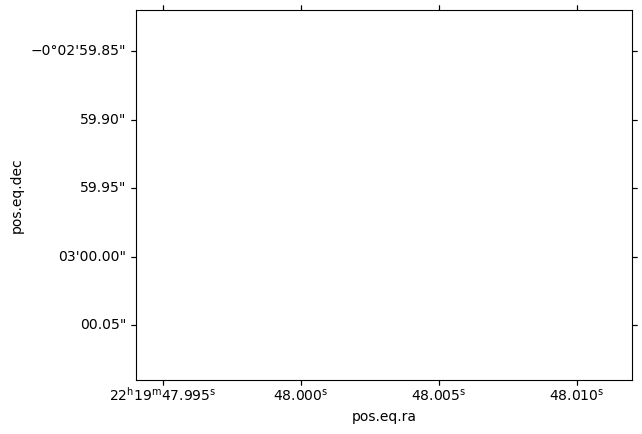

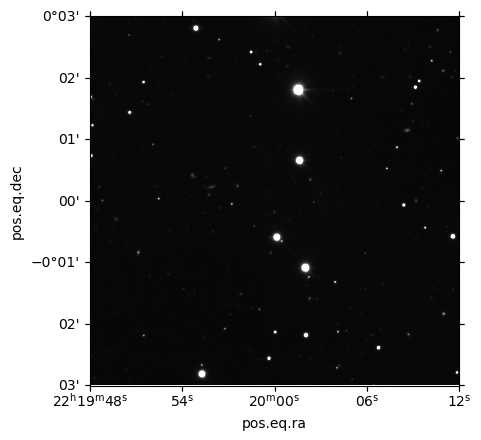

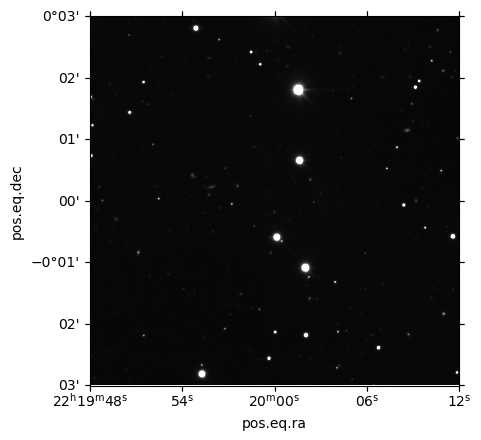

In [12]:
print(image.min(),image.max(),image.shape)

fig = plt.figure()

ax = plt.subplot(projection=wcs)
ax.imshow(image,cmap='gray',vmin=image.min(),vmax=image.min()+(image.max()-image.min())/100.)
plt.show()

In [13]:
sql = '''SELECT ra, dec, gmag 
            FROM nsc_dr2.object 
            WHERE Q3C_RADIAL_QUERY(ra,dec,{0},{1},{2})
            AND gerr < 0.1 AND gmag < 22
'''.format(ra, dec, fov/2)
df = qc.query(sql=sql, fmt='pandas')

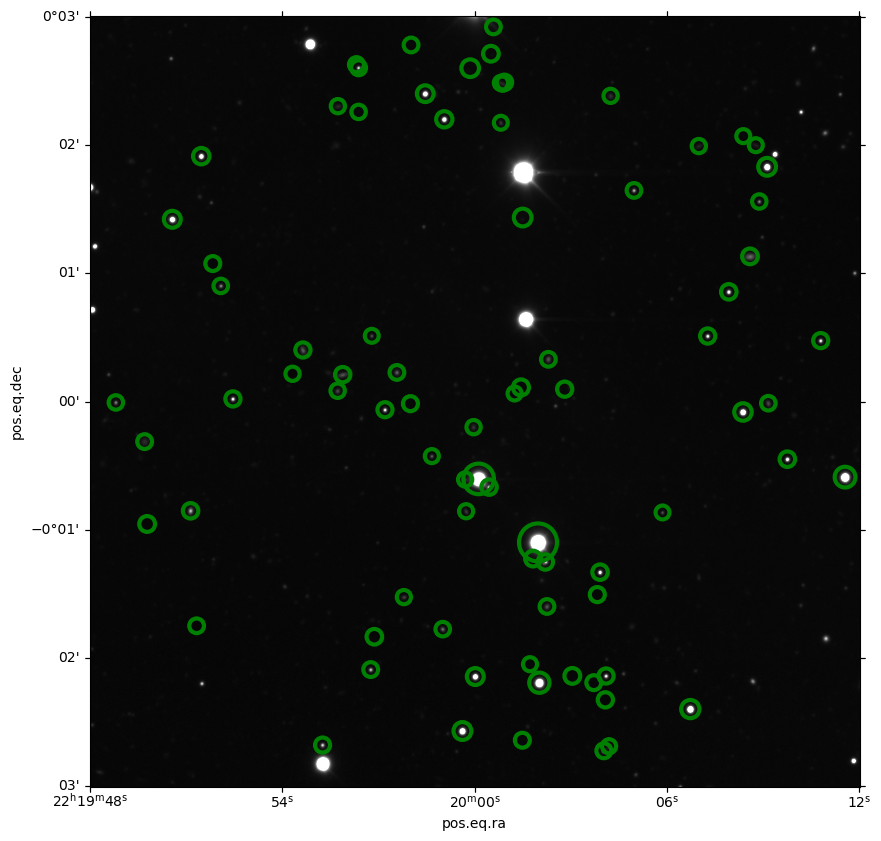

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(image, cmap='gray', vmin=image.min(), vmax=image.min()+(image.max()-image.min())/100.)
ax.scatter(df['ra'], df['dec'], transform=ax.get_transform('icrs'), s=1000./(df['gmag']-12), 
           edgecolor='green', facecolor='none', linewidths=3)
plt.show()

In [13]:
import sqlcl

def isInSDSS_DR12(ra, dec, radius=0.25):
  
    lines = sqlcl.query(ra, dec, radius).readlines()

    for line in lines:
        if "error" in str(line):
            return 0

    # No entry beyound the table header
    if len(lines) == 2:
        return 0
    
    return 1

In [15]:
isInSDSS_DR12(300.050624561, -38.5785797437, 0.25)

https://skyserver.sdss.org/dr18/en/tools/search/X_Results.aspx?cmd=+%0A+++%0A+SELECT+%0A+fieldID%2c+%0A+run%2c++%0A+camCol%2c++%0A+field%2c+%0A+ra%2c++%0A+dec%2c+%0A+run%2c+%0A+rerun++%0A+FROM+Field++++%0A++WHERE+ra+BETWEEN+299.800624561+and+300.300624561+and+dec+BETWEEN+-38.8285797437+and+-38.3285797437+%0A&searchtool=SQL&TaskName=Skyserver.Search.SQL&format=csv
[b'#Table1\n', b'fieldID,run,camCol,field,ra,dec,run1,rerun\n']
2


0

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("delv_in_sdss.csv")

In [10]:
df

,Galaxy,Priority,reachable,RA,Dec,Unnamed: 5,RA.1,Dec.1,DELVE
0,16262 SNAP28 (14/34),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CGCG-328-014,2.0,NO,NaN,NaN,NaN,NaN,NaN,NaN
2,CGCG-539-126,2.0,NO,NaN,NaN,NaN,NaN,NaN,NaN
3,CGCG-540-079,2.0,NO,NaN,NaN,NaN,NaN,NaN,NaN
4,ESO-137-G006,1.0,middle,243.765126,-60.907111,NaN,116.235,-60.907,maybe
...,...,...,...,...,...,...,...,...,...
63,CGCG-551-015,2.0,NO,20.128590,50.144400,NaN,20.129,50.144,NaN
64,NGC-3343,2.0,NO,161.543542,73.353131,NaN,161.544,73.353,NaN
65,IC-1143,2.0,NO,232.735200,82.455800,NaN,127.265,82.456,NaN
66,UGC-10918,2.0,middle,264.389250,11.121661,NaN,95.611,11.122,no


In [21]:
SDSS = []
RA = df.RA.values
Dec = df.Dec.values

for i in range(df.shape[0]):
    
    if not np.isnan(RA[i]):
        
        has_sdss = isInSDSS_DR12(RA[i], Dec[i])

        print(has_sdss)
        
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
